In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import socket
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import itertools

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = 'C:\\Users\\udayk\\Desktop\\mmj\\mmj\\ddos 1\\test_mosaic.csv'

df = pd.read_csv(data)

In [5]:
# view dimensions of dataset
df.shape

(346869, 78)

In [6]:
# let's preview the dataset

df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,...,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,DoS slowloris
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,...,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,DoS slowloris


In [7]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_Sec', 'Bwd_Packets_Sec',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN

In [8]:
# check distribution of target_class column

df['Label'].value_counts()

BENIGN           159295
DoS Hulk         132394
DoS slowloris     55180
Name: Label, dtype: int64

In [9]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346869 entries, 0 to 346868
Data columns (total 78 columns):
Destination_Port               346869 non-null int64
Flow_Duration                  346869 non-null int64
Total_Fwd_Packets              346869 non-null int64
Total_Backward_Packets         346869 non-null int64
Total_Length_of_Fwd_Packets    346869 non-null int64
Total_Length_of_Bwd_Packets    346869 non-null int64
Fwd_Packet_Length_Max          346869 non-null int64
Fwd_Packet_Length_Min          346869 non-null int64
Fwd_Packet_Length_Mean         346869 non-null float64
Fwd_Packet_Length_Std          346869 non-null float64
Bwd_Packet_Length_Max          346869 non-null int64
Bwd_Packet_Length_Min          346869 non-null int64
Bwd_Packet_Length_Mean         346869 non-null float64
Bwd_Packet_Length_Std          346869 non-null float64
Flow_Bytes_Sec                 346869 non-null float64
Flow_Packets_Sec               346869 non-null float64
Flow_IAT_Mean                

In [12]:
df.describe()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,346869.000000,3.468690e+05,346869.000000,346869.000000,3.468690e+05,3.468690e+05,346869.000000,346869.000000,346869.000000,346869.000000,...,346869.000000,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05
mean,4961.060302,2.504744e+07,10.393200,6.990642,4.817145e+02,1.091510e+04,229.852748,9.329130,48.988312,81.890953,...,5.520439,-1.438942e+03,3.115393e+05,1.746683e+05,4.663413e+05,1.892722e+05,1.369283e+07,2.458864e+06,1.581106e+07,1.173857e+07
std,15466.251164,3.554961e+07,727.578058,946.725060,5.105668e+03,2.187483e+06,327.231093,27.410889,68.262524,109.894059,...,686.392521,3.488797e+05,8.809394e+05,6.078540e+05,1.271205e+06,7.446716e+05,2.426684e+07,7.063630e+06,2.623197e+07,2.356036e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,3.092700e+04,2.000000,1.000000,5.800000e+01,0.000000e+00,37.000000,0.000000,25.777778,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,7.058250e+05,6.000000,1.000000,2.320000e+02,0.000000e+00,168.000000,0.000000,41.000000,61.354163,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,5.145649e+07,9.000000,2.000000,4.220000e+02,1.190000e+02,347.000000,6.000000,58.500000,131.033320,...,3.000000,2.000000e+01,1.614550e+05,0.000000e+00,2.067490e+05,3.588700e+04,1.928792e+07,0.000000e+00,2.450685e+07,1.230000e+07
max,65534.000000,1.200000e+08,218658.000000,291260.000000,1.286884e+06,6.410014e+08,23360.000000,2293.000000,4638.923469,7125.596846,...,207501.000000,9.300000e+01,5.245026e+07,2.020493e+07,5.245026e+07,5.245026e+07,1.200000e+08,7.720000e+07,1.200000e+08,1.200000e+08


In [14]:
X = df.drop(['Label'], axis=1)

y = df['Label']

In [15]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((277495, 77), (69374, 77))

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277495 entries, 15706 to 305711
Data columns (total 77 columns):
Destination_Port               277495 non-null int64
Flow_Duration                  277495 non-null int64
Total_Fwd_Packets              277495 non-null int64
Total_Backward_Packets         277495 non-null int64
Total_Length_of_Fwd_Packets    277495 non-null int64
Total_Length_of_Bwd_Packets    277495 non-null int64
Fwd_Packet_Length_Max          277495 non-null int64
Fwd_Packet_Length_Min          277495 non-null int64
Fwd_Packet_Length_Mean         277495 non-null float64
Fwd_Packet_Length_Std          277495 non-null float64
Bwd_Packet_Length_Max          277495 non-null int64
Bwd_Packet_Length_Min          277495 non-null int64
Bwd_Packet_Length_Mean         277495 non-null float64
Bwd_Packet_Length_Std          277495 non-null float64
Flow_Bytes_Sec                 277495 non-null float64
Flow_Packets_Sec               277495 non-null float64
Flow_IAT_Mean            

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69374 entries, 154763 to 218393
Data columns (total 77 columns):
Destination_Port               69374 non-null int64
Flow_Duration                  69374 non-null int64
Total_Fwd_Packets              69374 non-null int64
Total_Backward_Packets         69374 non-null int64
Total_Length_of_Fwd_Packets    69374 non-null int64
Total_Length_of_Bwd_Packets    69374 non-null int64
Fwd_Packet_Length_Max          69374 non-null int64
Fwd_Packet_Length_Min          69374 non-null int64
Fwd_Packet_Length_Mean         69374 non-null float64
Fwd_Packet_Length_Std          69374 non-null float64
Bwd_Packet_Length_Max          69374 non-null int64
Bwd_Packet_Length_Min          69374 non-null int64
Bwd_Packet_Length_Mean         69374 non-null float64
Bwd_Packet_Length_Std          69374 non-null float64
Flow_Bytes_Sec                 69374 non-null float64
Flow_Packets_Sec               69374 non-null float64
Flow_IAT_Mean                  69374 non-

In [20]:
cols = X_train.columns

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [23]:
X_test = pd.DataFrame(X_test, columns=[cols])

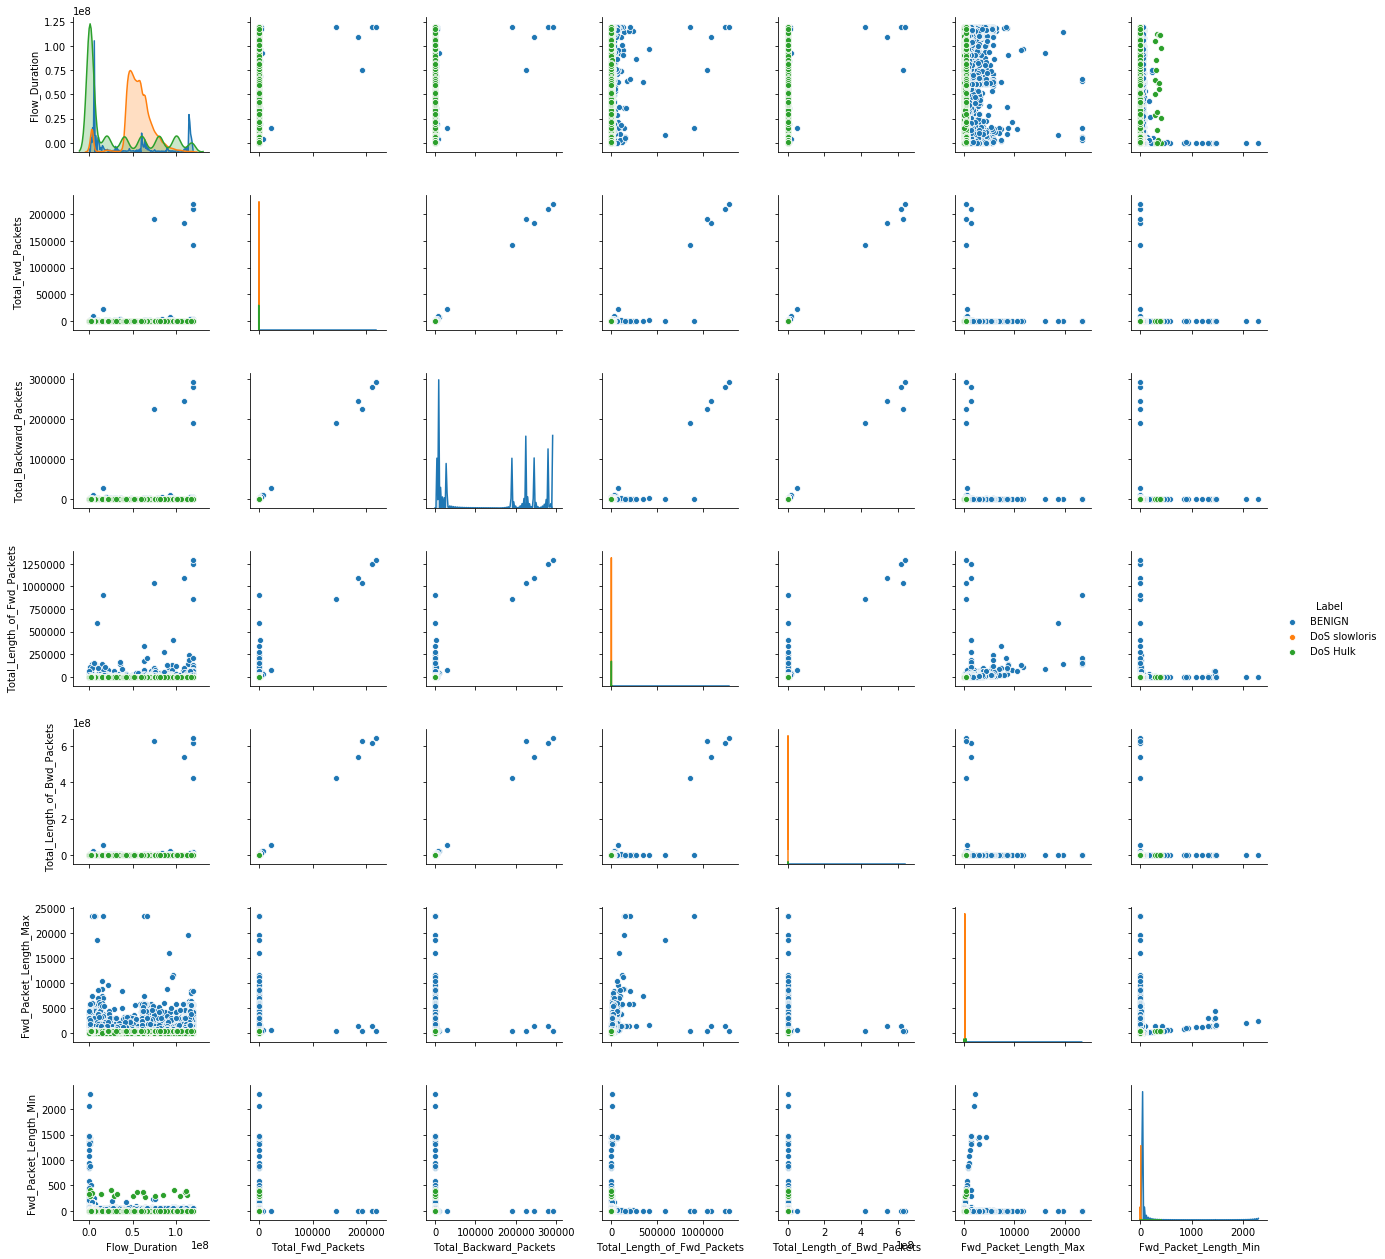

In [17]:

df1 = df.iloc[:,1:8]
sns.pairplot(df.dropna(),vars=df1.columns,hue= 'Label')

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
def models(X_train,X_test,y_train,y_test):
    names = ["K Nearest Neighbors", "XGBoost","Decision Tree", "Random Forest","ExtraTreesClassifier","SVM"]
    classifiers = [KNeighborsClassifier(20),
                   xgb.XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=100),
                   DecisionTreeClassifier(max_depth=10),
                   RandomForestClassifier(max_depth=5, n_estimators=100,max_features=7),
                   ExtraTreesClassifier(max_depth=5,n_estimators=100,max_features=7),
                   svm.SVC(kernel='rbf')]
    for name, clf in zip(names, classifiers):
        print(name,':')
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        y_pred=clf.predict(X_test)
        #to print precision recal  a and f score
        precision,recall,f_scor,support =precision_recall_fscore_support(y_test, y_pred, average='macro')
        print('Precision:',precision,'\n','Recall:',recall,'\n','F_Score:',f_scor,'\n')
        #confusion_matrix = ConfusionMatrix(y_test, y_pred)
        #print("Confusion matrix:\n%s" % confusion_matrix)
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, y_pred)
        np.set_printoptions(precision=2)
        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=df['Label'].unique(),
                              title='Confusion matrix, without normalization')
        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=df['Label'].unique(), normalize=True,
                              title='Normalized confusion matrix')
        plt.show()

        print(name+' Score:',score)
        print("###################################################################################################")
        prediction1 = clf.predict(X_test)
        np.set_printoptions(precision=2)
    return 1

K Nearest Neighbors :
Precision: 0.9965437060808737 
 Recall: 0.9974739115766647 
 F_Score: 0.9970065997980018 



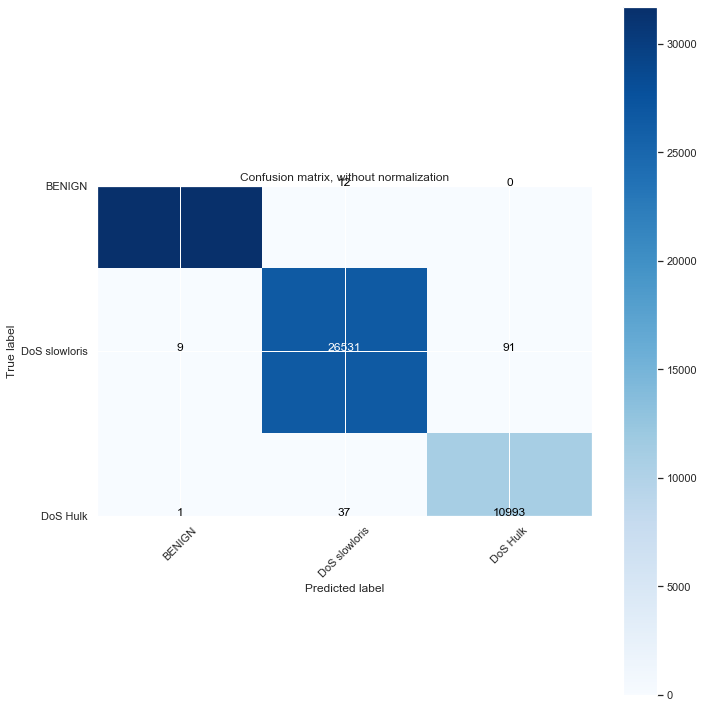

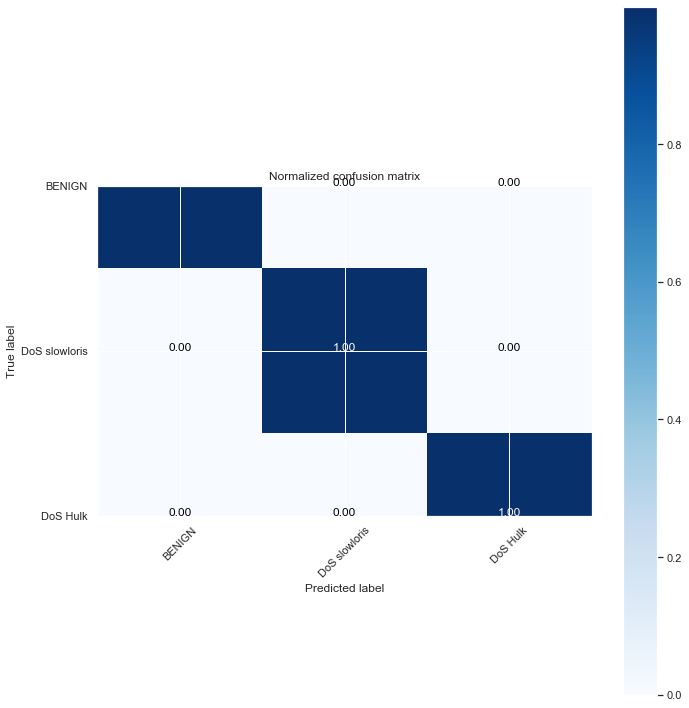

K Nearest Neighbors Score: 0.9978378066710871
###################################################################################################
XGBoost :
Precision: 0.9997445778778394 
 Recall: 0.9994435615835799 
 F_Score: 0.9995938377531705 



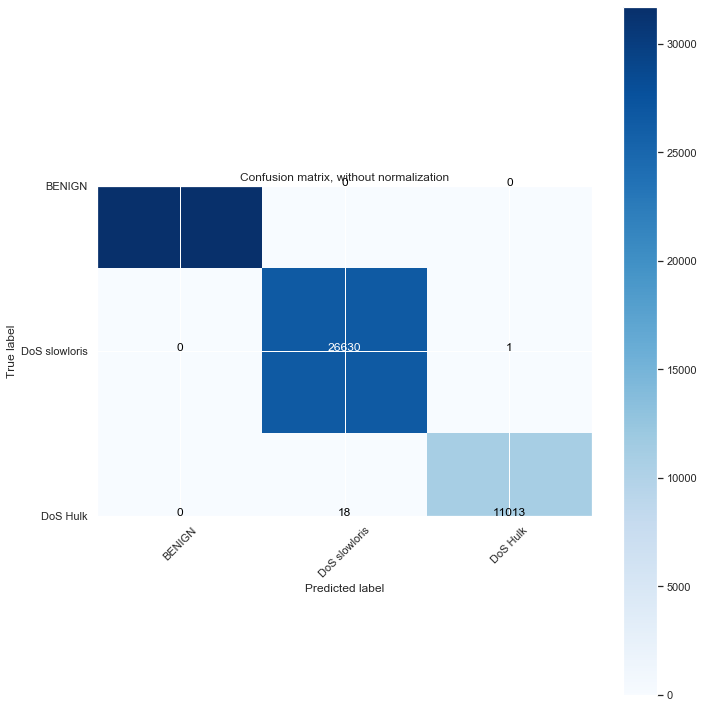

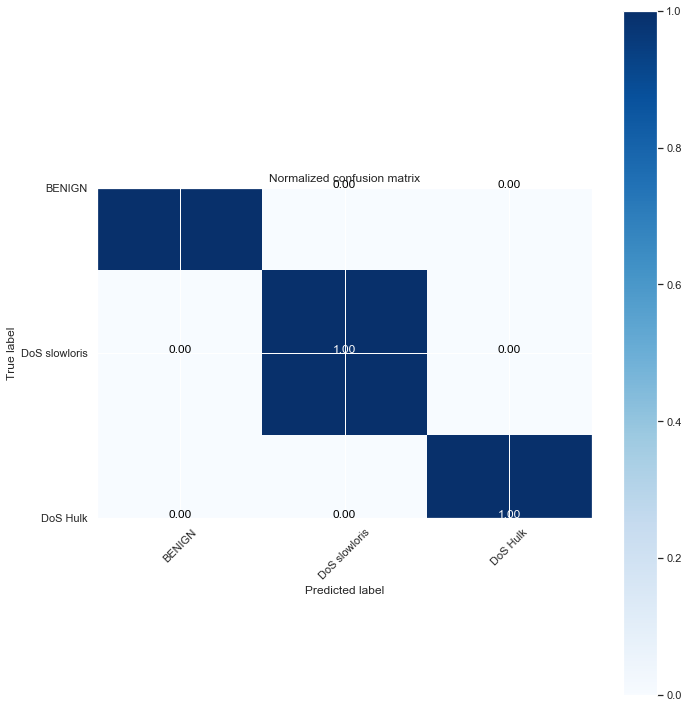

XGBoost Score: 0.9997261221783377
###################################################################################################
Decision Tree :
Precision: 0.9997915058569055 
 Recall: 0.9997621254883864 
 F_Score: 0.9997768092517187 



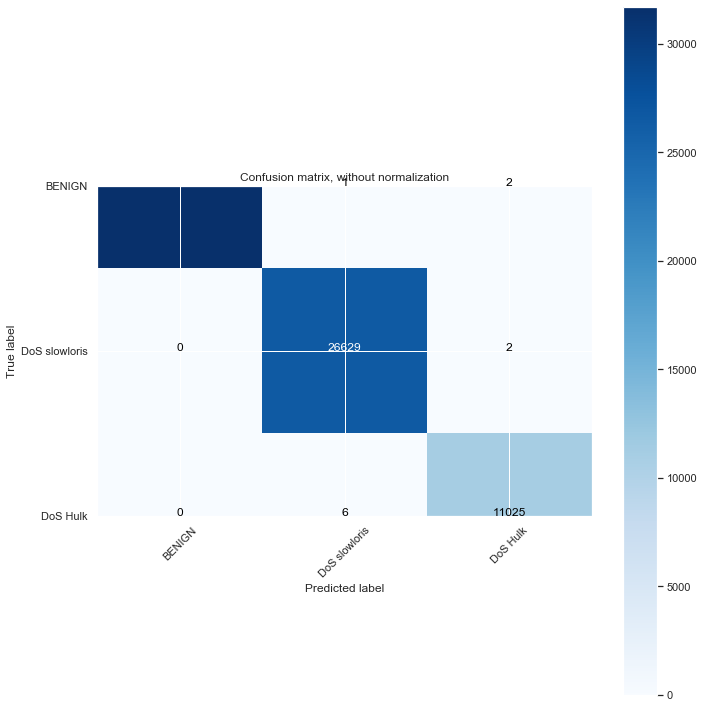

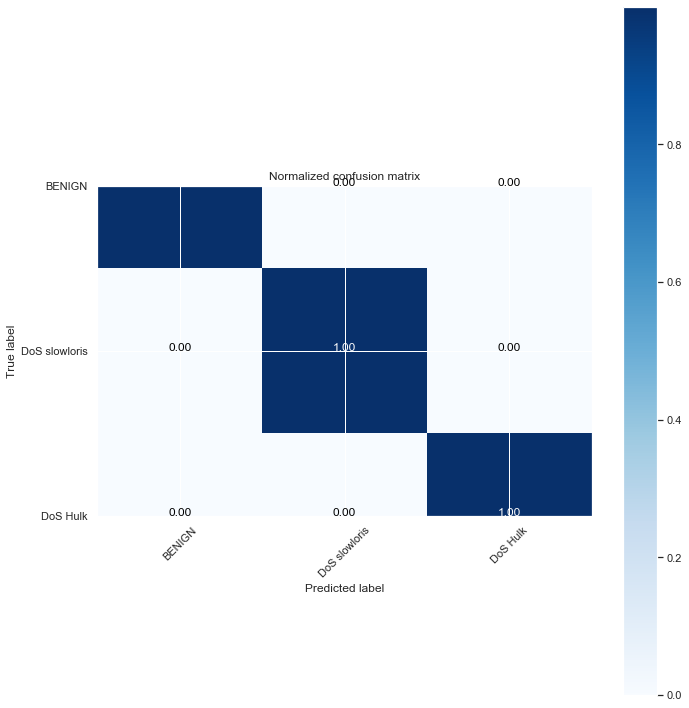

Decision Tree Score: 0.9998414391558798
###################################################################################################
Random Forest :
Precision: 0.9980153712237082 
 Recall: 0.9986998894676784 
 F_Score: 0.9983564172672974 



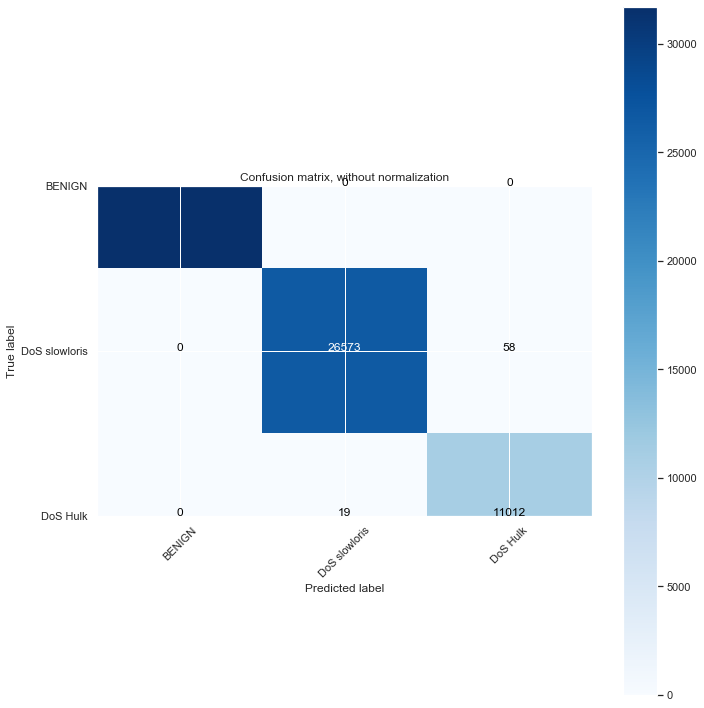

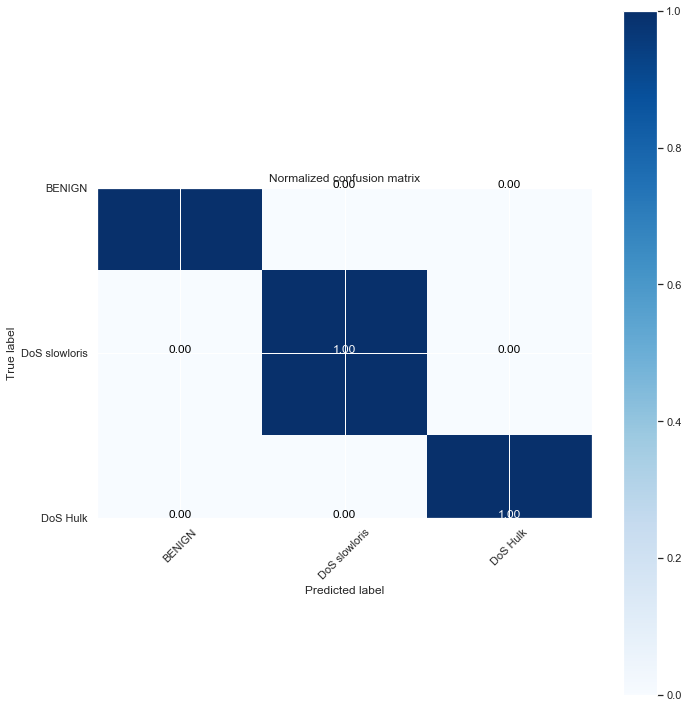

Random Forest Score: 0.998890074091158
###################################################################################################
ExtraTreesClassifier :
Precision: 0.9856324739121529 
 Recall: 0.9746943272302605 
 F_Score: 0.9799229577136613 



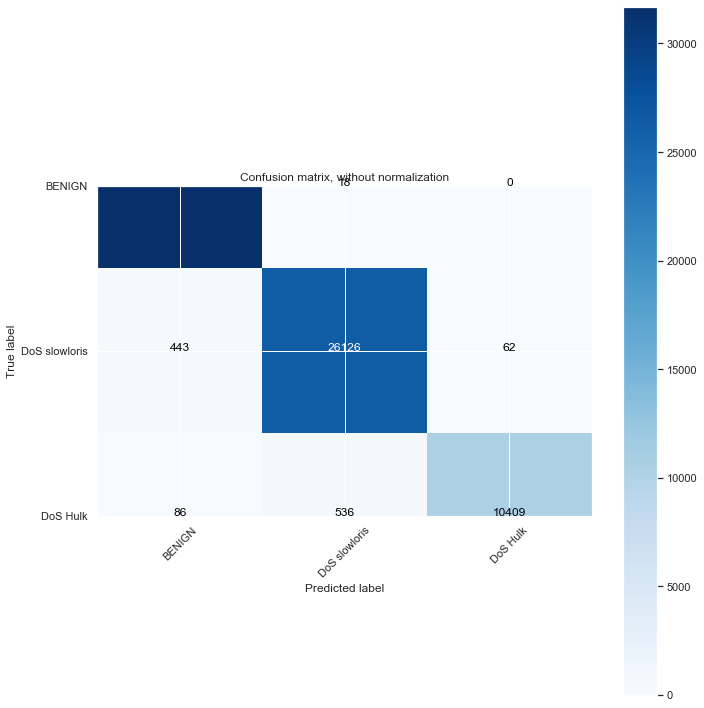

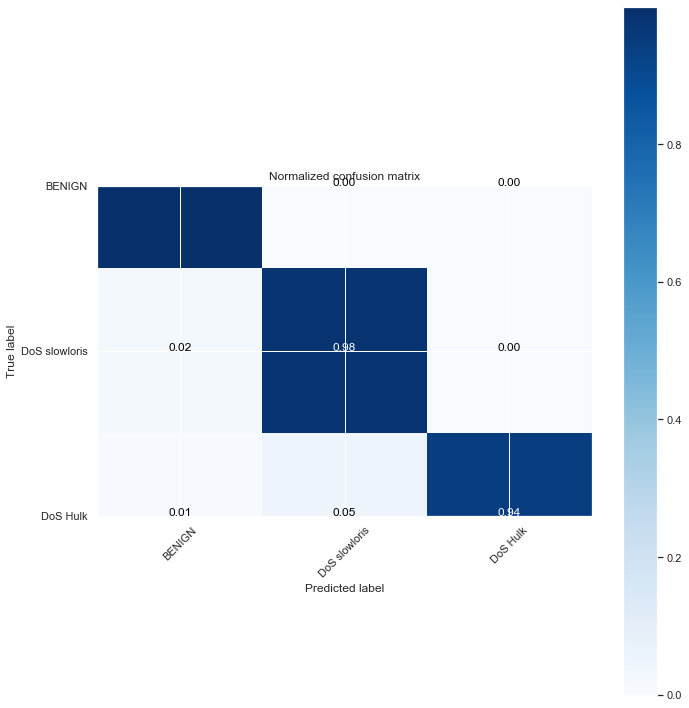

ExtraTreesClassifier Score: 0.9834952575892986
###################################################################################################
SVM :
Precision: 0.9988994112045345 
 Recall: 0.998932728797699 
 F_Score: 0.9989160661279225 



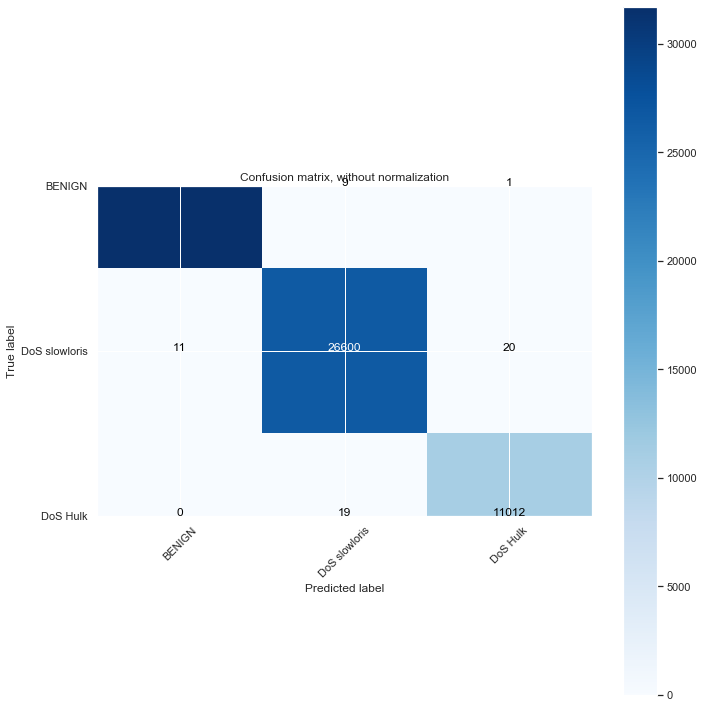

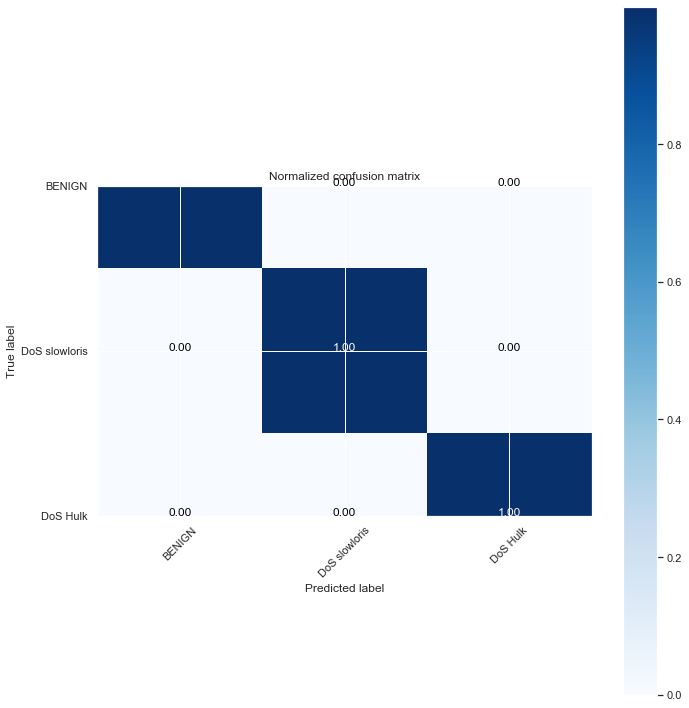

SVM Score: 0.9991351226684348
###################################################################################################


1

In [22]:
models(X_train,X_test,y_train,y_test)

In [26]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9991
